<a href="https://colab.research.google.com/github/aguusandy/pdi-2024/blob/master/Unidad1_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 1 Práctica


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# import de librerias
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys
from google.colab.patches import cv2_imshow   # eso este porque tiraba error el cv.imshow()

In [ ]:
print("Python version %s / OpenCV version %s " %(sys.version,cv.__version__))

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] / OpenCV version 4.8.0 


## Ejercicio 1:
Lectura, visualizacion y escritura de imagenes.
1. Realice la carga y visualizacion de diferentes imagenes.


In [ ]:
# EJERCICIO 1

url_img = "flores02.jpg"

img_gray = cv.imread(url_img, cv.IMREAD_GRAYSCALE)  # escala grises
img_color = cv.imread(url_img)                      # color

img_color_resize = cv.resize(img_color, (300, 300))
img_gray_resize = cv.resize(img_gray, (300, 300))

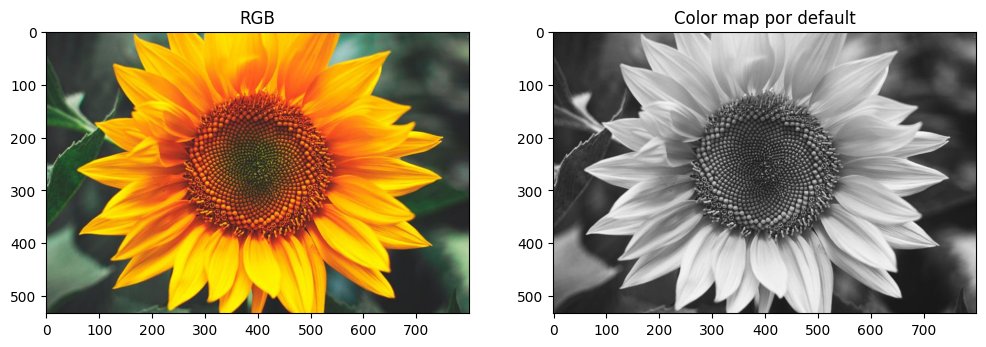

In [ ]:
# cv2_imshow(img_color_resize)
# cv2_imshow(img_gray_resize)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,12))

ax[0].imshow(img_color[:,:,::-1]) # invierte los canales, ::-1 indica que se recorre desde el ultimo elemento al primero
ax[0].set_title("RGB")

# Si es de un solo canal, y no se especifica nada mas, se dibuja una imagen con un mapa de color por defecto, asignando a cada nivel de gris un color RGB
ax[1].imshow(img_gray,cmap="gray")
ax[1].set_title("Color map por default")

plt.show()

2. Muestre en pantalla informacion sobre las imagenes.


In [ ]:
print("Dimensiones de la imagen:", img_color.shape)
print("Tipo de dato de la imagen: ", img_color.dtype)

Dimensiones de la imagen: (533, 800, 3)
Tipo de dato de la imagen:  uint8


3. Investigue los formatos la imagen y como leer y como escribir un valor puntual de la imagen.


In [ ]:
# Los tipos de imagen se dividen en 2 grupos: rasterizados(pixeles) y vectorizados(vectores)
# De los formatos rasterizados se destacan:
#   1. JPEG y JPG
#   2. PNG
#   3. BMP
#   4. GIF
#   5. TIFF
#   6. HEIF
#   7. RAW
#   8. PSD

# Para formato vectoriales:
#   1. SVG
#   2. EPS
#   3. PDF
#   4. INDD
#   5. AI

# Para leer y escribir en un pixel (x,y) se puede utilizar:
#   valor px = imagen[y,x]
#   imagen[y,x] = valor px

print("valor del pixel [50,50] en la imagen: ",img_gray_resize[50,50])


valor del pixel [50,50] en la imagen:  158


4. Utilice el pasaje por parametros para especificar la imagen a cargar.


In [ ]:
# Una biblioteca que permite el manejo del pasaje de parametros al programa es argparse y se debe incluir como
# import argparse

#se crea el analizador de parametros y se especifican
# ap = argparse.ArgumentParser()
# ap.add argument(‘‘-ig’’, ‘‘--imagen gris’’, required=True, help=‘‘path de la imagen de grises’’)
# ap.add argument(‘‘-ic’’, ‘‘--imagen color’’, required=True, help=‘‘path de la imagen color’’)
# args = vars(ap.parse args())

#se recuperan los par´ametros en variables o directamente se utilizan nombre
# imagen = args[‘‘imagen gris’’]
# imagen 2 = cv2.imread(args[‘‘imagen color’’])

5. Defina y recorte una subimagen de una imagen (vea ROI, Region Of Interest).


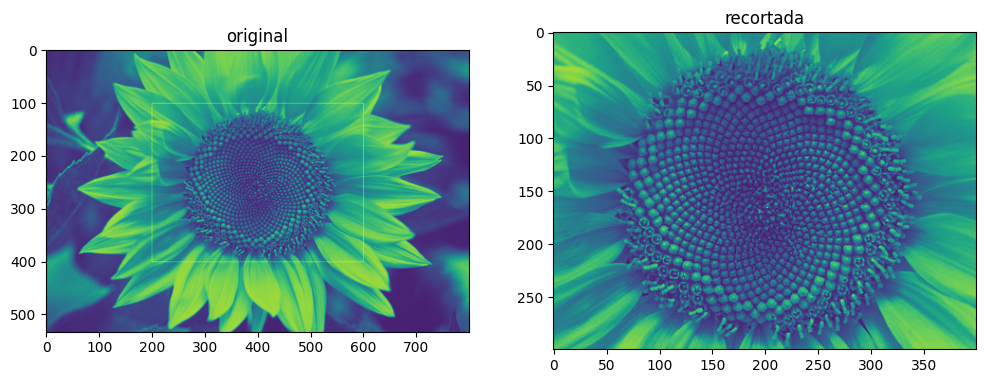

In [ ]:
# imagen2 = imagen[x0:x1,y0:y1].copy()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,12))

img_recortada_gray = img_gray[100:400,200:600].copy()   # le paso img[y0:y1,x9:x1] -> copia la imagen en [y,x]

ax[0].imshow(img_gray)
ax[0].set_title("original")

ax[1].imshow(img_recortada_gray)
ax[1].set_title("recortada")

plt.show()

6. Investigue y realice una funcion que le permita mostrar varias imagenes en una sola ventana.


In [ ]:
# le paso un vector de imagenes ya cargadas
def imprimir_imagenes(img_v):
  size_v = len(img_v)

  fig, ax = plt.subplots(nrows=size_v, ncols=1, figsize=(10,10))
  for idx,img in enumerate(img_v):
    ax[idx].imshow(img)
  plt.show()


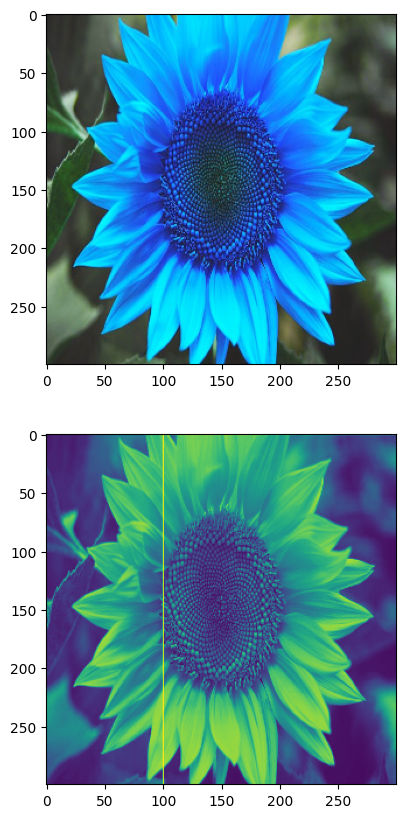

In [ ]:
img_v1 = [img_color_resize,img_gray_resize]
imprimir_imagenes(img_v1)

7. Dibuje sobre la imagen lıneas, cırculos y rectangulos (opcional: defina la posicion en base al click del mouse).

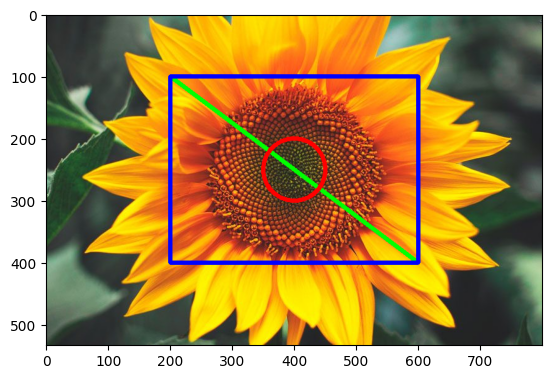

In [ ]:
img_rgb = img_color[:,:,::-1]

# lineas -> cv2.line(imagen, start point, end point, color, thickness, line type)
cv.line(img_color, (200,100), (600,400), color=(0, 255, 0) , thickness=5)

# circulo -> cv2.circle(imagen, center point, radius, color, thickness, line type)
cv.circle(img_color, (400,250), 50, color=(0,0,255),thickness=5)

# rectangulo -> cv2.rectangle(imagen, start point, end point, color, thickness)
cv.rectangle(img_color, (200,100), (600,400), color=(255, 0, 0) , thickness=5)

plt.imshow(img_rgb)


##Ejercicio 2: Informacion de intensidad.
1. Informe los valores de intensidad de puntos particulares de la imagen (opcional: determine la posicion en base al click del mouse).
2. Obtenga y grafique los valores de intensidad (perfil de intensidad) sobre una determinada fila o columna.
3. Grafique el perfil de intensidad para un segmento de interes cualquiera.

In [ ]:
img_gray2 = cv.imread(url_img, cv.IMREAD_GRAYSCALE)  # escala grises
img_gray2 = cv.resize(img_gray2, (300, 300))
img_gray2_c = img_gray2.copy()

In [ ]:
fil,col = [0,0]

# obtengo la intensidad de la imagen
intensidad = img_gray2_c[fil,col]

string = "Intensidad del punto ["+str(fil)+","+str(col)+"]: "+str(intensidad)
print(string)

Intensidad del punto [0,0]: 44


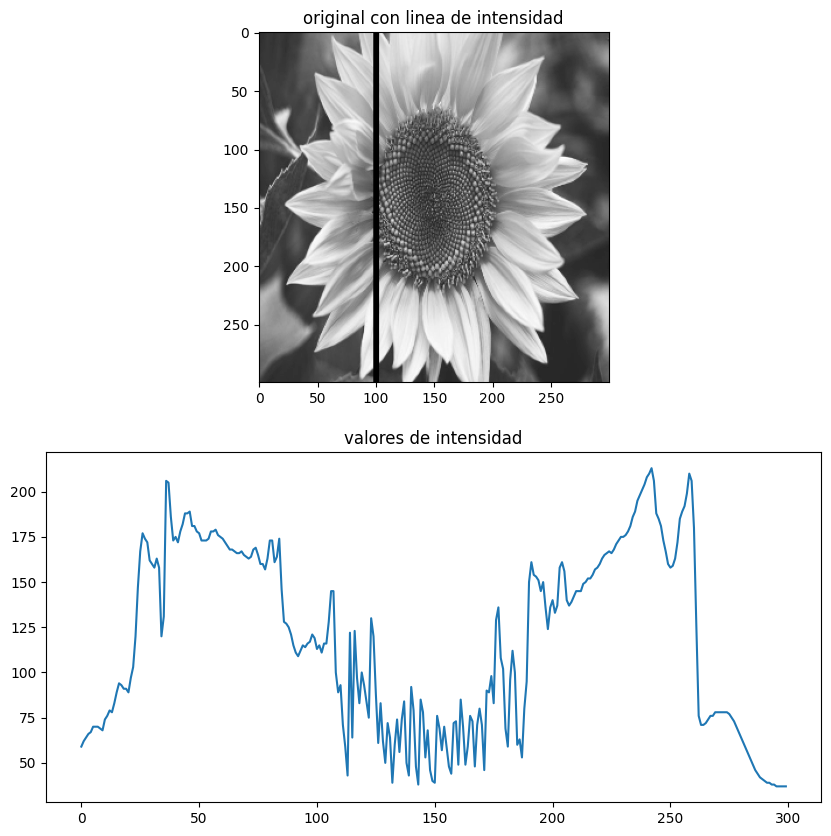

In [ ]:

# eligo la fila o columna
col = 100
# obtengo la cantidad de pixeles en x e y
n,m = img_gray2.shape
# obtengo la intensidad de toda la columna
intensidad_v = img_gray2[col,:]

# dibujo la linea
cv.line(img_gray2_c, (col,0), (col,m), color=(0, 255, 0) , thickness=4)

fig, ax2 = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
ax2[0].imshow(img_gray2_c,cmap='gray')
ax2[0].set_title("original con linea de intensidad")
ax2[1].plot(intensidad_v)
ax2[1].set_title("valores de intensidad")

plt.show()


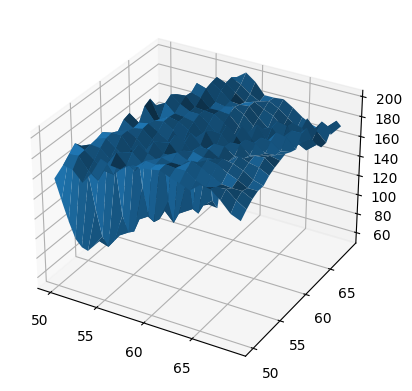

In [ ]:
# imprimimos el perfil de intensidad de un sector generico

# defino un cuadrado de la imagen
punto1 = [50,50]
punto2 = [70,70]

# defino los limites del cuadrado
x = np.arange(punto1[0],punto2[0])
y = np.arange(punto1[1],punto2[1])
x, y = np.meshgrid(x, y)

# obtengo los valores de intensidad para cada pixel del cuadrado y ploteo
z = img_gray2[ punto1[0]:punto2[0], punto1[1]:punto2[1]]
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
surf = ax.plot_surface(x, y, z)
plt.show()

## Ejercicio 3: Aplicacion
Utilice las herramientas aprendidas en esta unidad para implementar un sistema que permita identificar una botella que no esta correctamente llena. Las imagenes que se proporcionaran son capturadas con una camara fija, en escala de grises y directamente de la lınea de envasado. Para implementar el sistema debera bastarle una imagen de ejemplo “botella.tif” (que encontrara en el repositorio). Adicionalmente, se espera que el sistema pueda:

*   identificar una botella no-llena en cualquier posicion de la imagen.
*   indicar la posicion de la botella en la imagen (podrıa ser con un recuadro, informando la posicion relativa entre botellas, la posicion absoluta en pixels, etc).
*   informar el porcentaje de llenado de la botella no-llena.

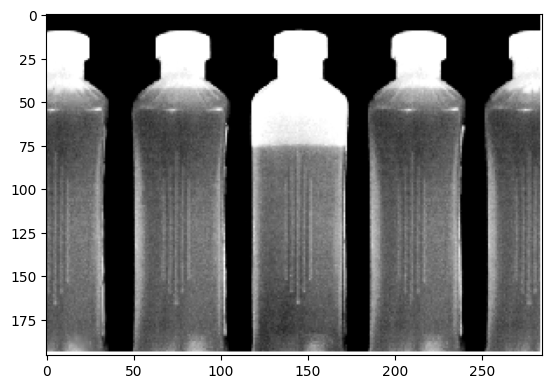

In [15]:
# ploteo de la imagen de las botellas
url_img_botella = "botellas.tif"
img_botella = cv.imread(url_img_botella,cv.IMREAD_GRAYSCALE)
plt.imshow(img_botella,cmap='gray')

### Para saber si una botella esta llena se consideran los siguientes pasos:

1. Coloco una linea horizontal como el limite minimo para que se considere llena la botella
2. Consido una aproximacion de 100 pixeles por botella
3. Comienzo a recorrer los pixeles del eje x, hasta que los proximos 5 pixeles a la derecha tengan valor 0, es decir, sea el fondo negro. Mantengo este contador para saber en que pixel x me encuentro, de modo de estar sobre la botella
4. Saco un promedio de la intensidad



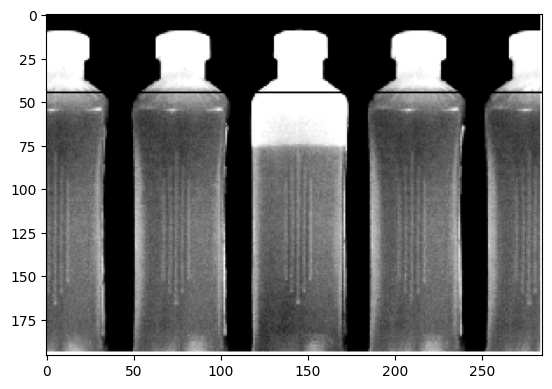

In [109]:
# propongo la linea limite donde considero que esta llena la botella
lim_y = 45
img_botella_min = img_botella.copy()
# tamaño de pixeles en x e y para la imagen
size_x = img_botella_min.shape[1]
size_y = img_botella_min.shape[0]
cv.line(img_botella_min, (0,lim_y), (size_x,lim_y), color=(0, 255, 0) , thickness=1)
plt.imshow(img_botella_min,cmap='gray')


In [110]:
def funcion_mayor(vector,escalar):
  res = vector > escalar
  return res.any() == False

In [111]:
def pos_termina_botella(pos_actual,img,max_x):
  # uso y = 100
  contador = pos_actual
  while img[100,contador] > 0 and contador < max_x-1:
    contador+=1
  return contador

In [113]:
# recorro en x, por debajo de la linea limite, para saber si me encuentro dentro de una botella
# si la intensidad en [x,y] es 0 entonces estoy fuera
# si la intensidad en [x,y] es mayor a 0 entonces estoy dentro de una botella
# si la intensidad en [x,y] es 255 entonces esta vacia la botella
pos_x = 0
botella = True
vector_botellas = []
while pos_x < size_x-1:
  final_botella = pos_termina_botella(pos_x,img_botella_min,size_x)
  dif_pixeles = final_botella - pos_x
  # verifico si estoy dentro de una botella
  if img_botella_min[lim_y-1,pos_x + int(dif_pixeles/2)] > 0:
    # encuentro donde termina la botella
    if img_botella_min[lim_y-1,pos_x + int(dif_pixeles/2)] == 255: # esta vacia la botella, entonces la remarco
      # remarco la botella vacia
      print("pos x ",pos_x)
      print("final_botella ",final_botella)
      print("dif pixeles ",dif_pixeles)
      vector_botellas.append([[pos_x,lim_y-10],[pos_x+dif_pixeles,size_y]])
    pos_x = final_botella
  else:
    pos_x+=1
# cv.rectangle(img_botella_min, (pos_x,lim_y-10), (pos_x+int(dif_pixeles/2),size_y), color=(120, 120, 0) , thickness=2)


pos x  118
final_botella  172
dif pixeles  54


In [114]:
print(vector_botellas)

[[[118, 35], [172, 196]]]


[118, 35]
[172, 196]


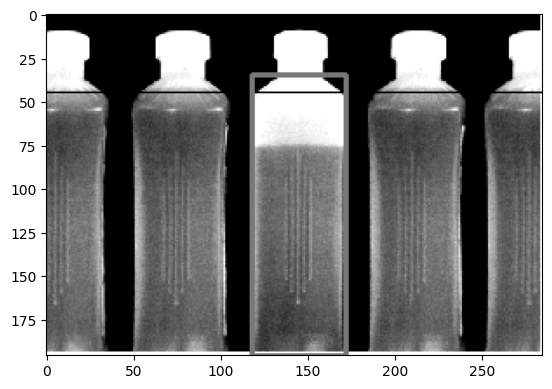

In [115]:
# ploteo el resultado

# cv.rectangle(img_botella_min, (pos_x,lim_y-10), (pos_x+int(dif_pixeles/2),size_y), color=(120, 120, 0) , thickness=2)
for i in range(0,len(vector_botellas)):
  aux = vector_botellas[i]
  punto0 = aux[0]
  print(punto0)
  punto1 = aux[1]
  print(punto1)
  cv.rectangle(img_botella_min, punto0, punto1, color=(120, 120, 0) , thickness=2)


plt.figure()
plt.imshow(img_botella_min,cmap='gray')
plt.show()

### informar cuan lleno esta la botella